In [1]:
# Import and set anything you might need
import requests
import json
import base64
import hmac
import hashlib
import datetime, time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from datetime import date
d1 = date.today()
import logging
logging.basicConfig(filename="Gemini.log",
                    format='%(asctime)s %(message)s',
                    filemode='w')
logging.getLogger().setLevel(logging.INFO)

In [2]:
# Pull 24 Hour Change Data from Gemini

base_url = "https://api.gemini.com/v1"
response = requests.get(base_url + "/pricefeed")
prices = response.json()

print(prices)
logging.info("INFO - API GET")

[{'pair': 'BTCDAI', 'price': '59385.45', 'percentChange24h': '-0.0198'}, {'pair': 'ENJUSD', 'price': '3.2424', 'percentChange24h': '0.0902'}, {'pair': 'BTCGUSD', 'price': '59355.34', 'percentChange24h': '-0.0206'}, {'pair': 'LTCUSD', 'price': '219.55', 'percentChange24h': '-0.0566'}, {'pair': 'LTCBTC', 'price': '0.00368', 'percentChange24h': '-0.0417'}, {'pair': 'LTCETH', 'price': '0.0521', 'percentChange24h': '-0.0493'}, {'pair': 'STORJUSD', 'price': '2.0554', 'percentChange24h': '0.2011'}, {'pair': 'ETHGUSD', 'price': '4191.24', 'percentChange24h': '-0.0126'}, {'pair': 'BTCUSD', 'price': '59333.66', 'percentChange24h': '-0.0194'}, {'pair': 'AMPUSD', 'price': '0.05075', 'percentChange24h': '-0.0475'}, {'pair': 'LTCBCH', 'price': '0.3875', 'percentChange24h': '-0.0105'}, {'pair': 'ZECBCH', 'price': '0.26', 'percentChange24h': '0.0000'}, {'pair': 'FILUSD', 'price': '52.761', 'percentChange24h': '-0.0573'}, {'pair': 'EFILUSD', 'price': '52.761', 'percentChange24h': '-0.0573'}, {'pair': '

In [3]:
# Check to see how the data looks
prices
logging.info("INFO - Check to see how the data looks")

In [4]:
# Convert the data into 2 different dataframes, and check the first couple.
df_gain = pd.json_normalize(prices)
df_loss = pd.json_normalize(prices)
df_gain.head()
logging.info("INFO - Convert the data into 2 different dataframes, and check the first couple.")

In [5]:
# Set all the 24 hour % change data as floats
df_gain['percentChange24h'] = df_gain['percentChange24h'].astype(float)
df_loss['percentChange24h'] = df_gain['percentChange24h'].astype(float)
logging.info("INFO - Set all the 24 hour % change data as floats.")

In [6]:
# Set 'x' to the absolute value of all 24 hour % change data 
x = abs(df_gain['percentChange24h'])
x
logging.info("INFO - Set 'x' to the absolute value of all 24 hour % change data.")

In [7]:
# Get a simple statistical breakdown of the 24 hour % change data
x.describe()
logging.info("INFO - Get a simple statistical breakdown of the 24 hour % change data")

In [8]:
# Set x to the standard deviation of the 24 hour % change data
x = x.describe()["std"]
x
logging.info(f"INFO std = {x}")

In [9]:
# Adjust the data frames to only show pairs below and about the std
logging.getLogger().setLevel(logging.ERROR)
df_gain = df_gain[df_gain.percentChange24h > x]
df_loss = df_loss[df_loss.percentChange24h < -x]
logging.error(f"ERROR - The following coins are more than one standard deviation in growth from the total 24 hour % change {df_gain}")
logging.error(f"ERROR - The following coins are more than one standard deviation in growth from the total 24 hour % change {df_loss}")

In [10]:
print(f"ALERT: The following coins are more than one standard deviation in growth from the total 24 hour % change for {d1}\n Standard Deviation - {x}%")
df_gain

ALERT: The following coins are more than one standard deviation in growth from the total 24 hour % change for 2021-11-18
 Standard Deviation - 0.043166211090540064%


,pair,price,percentChange24h
1,ENJUSD,3.2424,0.0902
6,STORJUSD,2.0554,0.2011
18,AUDIOUSD,2.412,0.0884
20,CUBEUSD,17.6428,0.0769
22,MKRUSD,2953.03,0.0620
27,CRVUSD,4.1189,0.0442
44,MANAUSD,3.80918,0.1624
58,WCFGUSD,1.501,0.0475
62,RAREUSD,1.819,0.1912
65,SANDUSD,4.24422,0.2351


In [11]:
print(f"ALERT: The following coins are more than one standard deviation in loss from the total 24 hour % change for {d1}\n Standard Deviation - {x}%")
df_loss

ALERT: The following coins are more than one standard deviation in loss from the total 24 hour % change for 2021-11-18
 Standard Deviation - 0.043166211090540064%


,pair,price,percentChange24h
3,LTCUSD,219.55,-0.0566
5,LTCETH,0.0521,-0.0493
9,AMPUSD,0.05075,-0.0475
12,FILUSD,52.761,-0.0573
13,EFILUSD,52.761,-0.0573
31,BATETH,0.0002498,-0.0556
35,INJUSD,11.0658,-0.0649
37,UMAUSD,17.8009,-0.0598
40,XTZUSD,5.0371,-0.0470
41,ALCXUSD,383.2,-0.1185


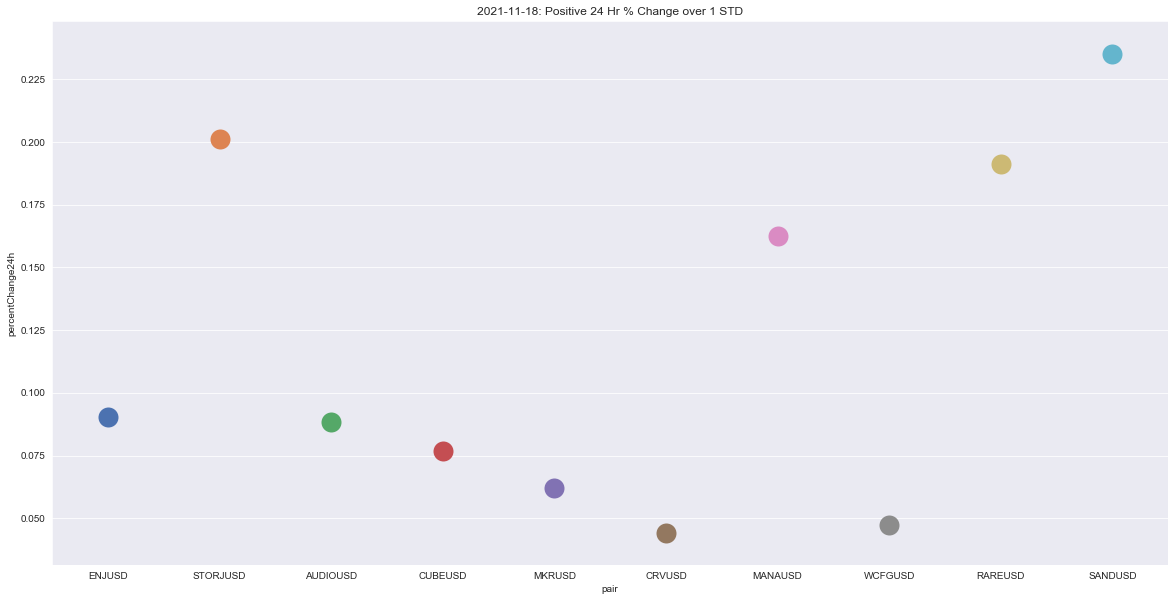

In [12]:
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.swarmplot(x="pair", y="percentChange24h", data=df_gain, size=20, palette="deep").set(title=f'{d1}: Positive 24 Hr % Change over 1 STD')
plt.show()
logging.error("ERROR - Scatterplot for Positive 24 Hr % Change over 1 STD")

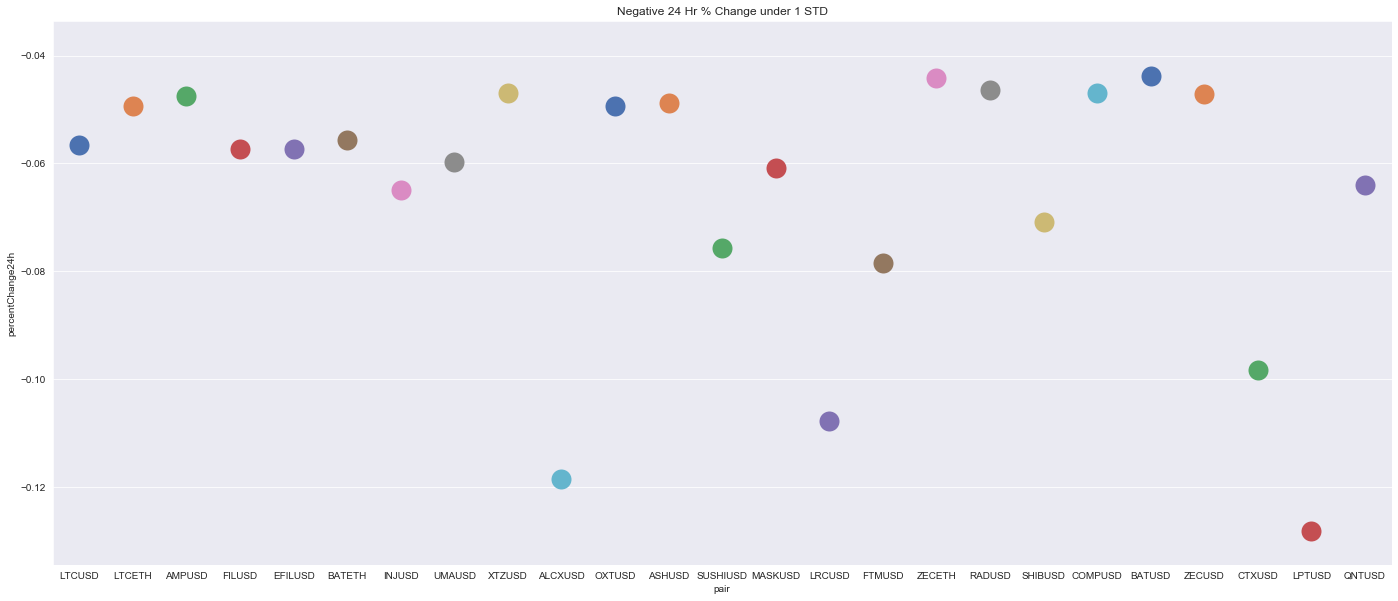

In [13]:
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(24,10)
sns.swarmplot(x="pair", y="percentChange24h", data=df_loss, size=20, palette="deep").set(title='Negative 24 Hr % Change under 1 STD')
plt.show()
logging.error("ERROR - Scatterplot for Negative 24 Hr % Change under 1 STD")